# Relatório Parcial

## Códigos fonte sendo importados

In [1]:
# imports
from src import *
import shapely
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

%matplotlib widget
# ignorando avisos redundantes.
import warnings
warnings.filterwarnings("ignore")

/home/ggrl/.config/ambiente_geologico/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
%reload_ext autoreload

## RESUMO

        A grafita é um bem mineral de importância tecnológica emergente com as novas propriedades descobertas nas últimas décadas no ramo da engenharia de nanomateriais, como no emprego de fabricação de baterias elétricas, supercondutores e fibras leves de alta resistência, e com potencial para fabricação de materiais essenciais para a indústria. Estes novos usos têm aumentado a demanda pela commoditie, trazendo assim, a necessidade de descoberta de novos depósitos economicamente viáveis levando em conta sua localização, volume e grau de pureza. Recentemente, as técnicas de aprendizagem de máquina têm aumentado a viabilidade dos projetos de prospecção mineral devido ao seu baixo custo de execução e sua alta capacidade de correlação de inúmeras variáveis simultaneamente.
        Com isto, neste projeto, pretende-se utilizar algoritmos de inteligência computacional e dados de sensores remotos para identificar padrões entre os atributos geofísicos e suas classes litológicas mineralizantes, bem como de suas ocorrências minerais. Assim, desenvolvendo novos mapas litológicos para confrontar os existentes e mapas prospectivos de minério de grafita no sistema de nappes de Socorro–Guaxupé no nordeste do estado de São Paulo, divisa com Minas Gerais.

## I. INTRODUÇÃO	

### 1.1 APRESENTAÇÃO

        A grafita possui grande importância industrial e sua demanda tem aumentado devido aos novos usos com potencial de crescimento ainda maior com a ascensão dos motores elétricos em detrimento dos motores à combustão e a necessidade de baterias de alta capacidade para aqueles. Assim, este material tem se tornado estratégico com os preços da grafita de alto teor (grafita em flocos) ultrapassando a casa dos milhares de dólares por toneladas métricas dependendo do tamanho dos flocos.

### 1.2 OBJETIVOS

        Esta pesquisa tem como objetivo a prospecção de áreas potenciais de mineralização de minério de grafita no sistema de nappes de Socorro–Guaxupé com o auxílio das técnicas de aprendizagem de máquina supervisionada e não-supervisionada com dados de sensores aeroportados disponibilizados pela CPRM.

### 1.3 ÁREA DE ESTUDO
        A área de estudo tem como foco os terrenos granulíticos do nordeste de São Paulo, divisa com o estado de Minas Gerais, região em que as rochas sofreram um alto grau de metamorfismo possibilitando a mineralização de grafita, assim como eventos posteriores como intrusões ígneas que reativam os processos metamórficos nas bordas de contato deste corpo intrusivo assim como em sua rocha encaixante.

In [38]:
litotipos_grafitosos = filtro(importar_geometrias('litologia_1kk'),'rafit')

In [6]:
litotipos_granuliticos = filtro(importar_geometrias('litologia_1kk'),'granulit')

In [78]:
litotipos_grafitosos['MAPA']

944        Carta geológica da folha Uruguaiana
949        Carta geológica da folha Uruguaiana
1215     Carta geológica da folha Porto Alegre
1984            Carta geológica da folha Goiás
1988            Carta geológica da folha Goiás
                         ...                  
46119        Carta geológica da folha Rio Doce
46180        Carta geológica da folha Salvador
46223         Carta geológica da folha Aracaju
46227         Carta geológica da folha Aracaju
46537         Carta geológica da folha Aracaju
Name: MAPA, Length: 380, dtype: object

100%|██████████| 2/2 [00:00<00:00, 584.12it/s]
49it [00:00, 12547.83it/s]


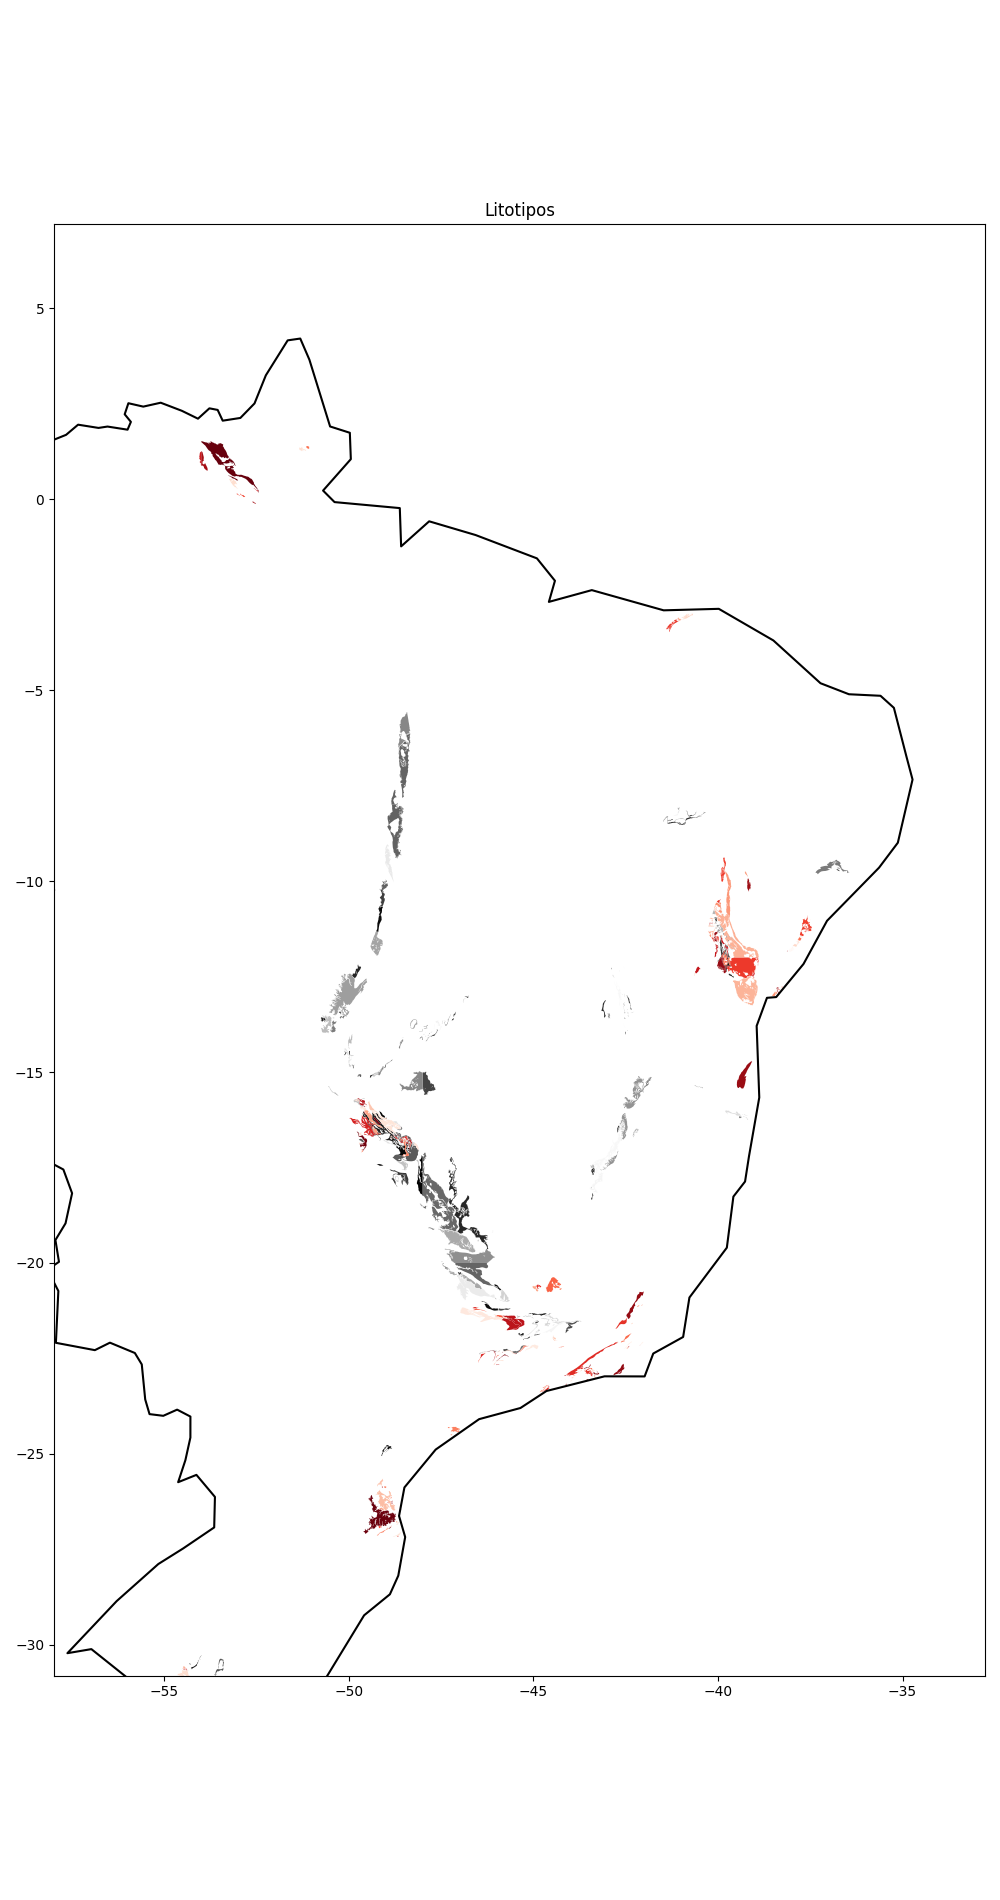

In [107]:
# let's plot something similar to your stuff
fig, (ax1) = plt.subplots(1,1,figsize=(10,19))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))         
brazil = world[world.name == 'Brazil']

brazil.boundary.plot(ax=ax1, color="black")
ax1.set_title('Litotipos')
litotipos_grafitosos.plot(ax=ax1,cmap='gray')
litotipos_granuliticos.plot(ax=ax1,cmap='Reds_r')
ax1.set_ylim(bounding_box(litotipos_grafitosos)[2])
ax1.set_xlim(bounding_box(litotipos_grafitosos)[0])
ax1.set_label('SIGLA')


plt.show()

100%|██████████| 1/1 [00:00<00:00, 511.75it/s]
42it [00:00, 3763.96it/s]


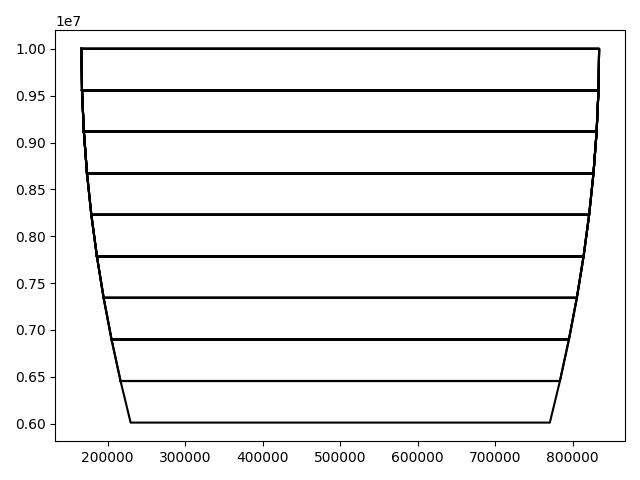

In [110]:
plt.figure()
plot_mc_base(Build_mc('1kk',['S']))

##  II. CONTEXTO GEOLÓGICO        

### 2.1 NAPPE SOCORRO

### 2.2 NAPPE GUAXUPÉ

 III. A GRAFITA	6
 
3.1 APRESENTAÇÃO	6

3.2 OCORRÊNCIA	6

3.3 TIPOS DE MINERALIZAÇÃO DE GRAFITA	6

3.4 GRAFITA NO SISTEMA DE NAPPES SOCORRO –GUAXUPÉ	6

 IV. MATERIAIS	7
 
4.1 APRESENTAÇÃO	7

4.2 PROJETOS AEROGEOFÍSICOS	7

4.2.1 SÃO JOSÉ DOS CAMPOS – RESENDE	7

4.2.2 SÃO PAULO – RIO DE JANEIRO (ÁREA SÃO PAULO)	7

4.2.3 ÁREA 14 MINAS GERAIS – POÇOS DE CALDAS – VARGINHA – ANDRELÂNDIA	7

4.3 FERRAMENTAS	7

 V. MÉTODOS	8
 
5.1 APRESENTAÇÃO	8

5.2 MÉTODO AEROMAGNETOMÉTRICO	8

5.3 PROCESSAMENTO DE DADOS AEROMAGNETOMÉTRICOS	8

 5.3.1 Pré-processamento dos dados aeromagnetométricos	8
 
 5.3.2 Interpolação dos dados aeromagnetométricos	8
 
 5.3.3 Amplitude do Sinal Analítico	8
 
 5.3.4 Gradiente Horizontal Total	8
 
5.4 MÉTODO AEROGAMAESPECTROMÉTRICO	8

5.5 PROCESSAMENTO DE DADOS AEROGAMAESPECTROMÉTRICOS	8

 5.5.1 Pré-processamento dos dados aerogamaespectrométricos	8
 
 5.5.2 Interpolação dos dados gama espectrométricos	8
 
 5.5.3 Mapas ternários	8
 

5.6 MÉTODOS DE CLASSIFICAÇÃO NÃO-SUPERVISIONADA	8

 5.6.1 SELF-ORGANIZING MAPS (SOM)	8
 
5.7 MÉTODOS DE CLASSIFICAÇÃO SUPERVISIONADA	8

 5.7.1 RANDOM FORESTS	8
 
 5.7.1 SUPPORT VECTOR MACHINES	8
 
VI. RESULTADOS E DISCUSSÕES	9

 6.1 APRESENTAÇÃO	9
 
 
 6.2 INTERPRETAÇÃO DOS DADOS AEROMAGNETOMÉTRICOS	9
 
VII. CONCLUSÕES	10

VIII. BIBLIOGRAFIA	11
